In [35]:
pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [109]:
#install spotify library
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [37]:
pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
import requests

# Data Collection

In [39]:
client_ID='1f49222707884e9192b731ca78927dde'
client_secret='91da8ae605a84fd39736e5eba5003082'
AUTH_URL='https://accounts.spotify.com/api/token'
AUTH_response=requests.post(AUTH_URL, {'grant_type':"client_credentials", 'client_id': client_ID, 'client_secret': client_secret})
auth_response_data=AUTH_response.json()
auth_response_data
access_token=auth_response_data['access_token']
headers={"Authorization": 'Bearer {token}'.format(token=access_token) }
# another way to do it is using a credentials function
def spotify_login(client_ID, client_secret):
    client_credentials_manager = SpotifyClientCredentials(client_id=client_ID, client_secret=client_secret) 
    return spotipy.Spotify(client_credentials_manager=client_credentials_manager)
sp=spotify_login(client_ID, client_secret)

In [40]:
#spotify api url that has all endpoints let's call it base_url
# base_url='https://api.spotify.com/v1/'

In [41]:
def call_playlist(creator, playlist_id):
    
    #step1

    playlist_features_list = ["artist","album", "track_name",  "track_id", "danceability","energy","key","loudness","mode", "speechiness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"]
    
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    #step2
    
    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    for track in playlist:
        # Create empty dict
        playlist_features = {}
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        playlist_features["popularity"]= track["track"]["popularity"]
        playlist_features["artist_uri"]= track["track"]["artists"][0]["uri"]
        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]
        
        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)

    #Step 3
        
    return playlist_df

In [42]:
african_heat=call_playlist('spotify', '37i9dQZF1DWYkaDif7Ztbp')
african_heat.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity,artist_uri
0,Kizz Daniel,Buga (Lo Lo Lo),Buga (Lo Lo Lo),4eZZofkV1OQ9GDqAgHqNpA,0.920,0.716,8,-7.104,1,0.1050,0.002220,0.1040,0.961,115.991,183103,4,72.0,spotify:artist:1X6cBGnXpEpN7CmflLKmLV
1,Burna Boy,Last Last,Last Last,2PDgArI0p7UkeYgXWuqpmh,0.795,0.565,3,-4.457,0,0.0948,0.000000,0.0802,0.550,87.925,172342,4,76.0,spotify:artist:3wcj11K77LjEY1PkEazffa
2,SPINALL,PALAZZO,PALAZZO,2SaRkvUkzNzL39fBB2hLpt,0.819,0.659,5,-9.024,1,0.0973,0.000000,0.0435,0.441,116.054,186002,4,67.0,spotify:artist:2NtQA3PY9chI8l65ejZLTP
3,Falz,B A H D,All Night,1MQaVZyTK4Fqm8OZy3wE6q,0.860,0.791,4,-7.672,1,0.1160,0.000081,0.1050,0.627,102.998,143301,4,26.0,spotify:artist:2s187JqHC9kipPLBLWXubl
4,Pheelz,Finesse,Finesse,3UqcIgObI7zZk8e7nvqmfc,0.861,0.537,1,-8.199,0,0.1590,0.000000,0.2890,0.769,102.014,151765,4,63.0,spotify:artist:5Jv1MsZBh0sqokFq7pU8Xg


We can also extract data from datasets published in public repositories or spotify dataset website. The purpose of using api to collect datasets is to personalize the kind of playlist you want to use for your project

In [43]:
df=pd.read_csv('https://raw.githubusercontent.com/enjuichang/PracticalDataScience-ENCA/main/data/processed_data.csv')
#save csv file
df.to_csv('processed_dataset.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms_x,album_name,...,type,id,uri,track_href,analysis_url,duration_ms_y,time_signature,artist_pop,genres,track_pop
0,0,0,0,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,...,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4,74,dance_pop hip_hop hip_pop pop pop_rap r&b rap ...,69
1,1,7734,73,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,...,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4,74,dance_pop hip_hop hip_pop pop pop_rap r&b rap ...,69
2,2,14037,14,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,...,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4,74,dance_pop hip_hop hip_pop pop pop_rap r&b rap ...,69
3,3,21536,42,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,...,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4,74,dance_pop hip_hop hip_pop pop pop_rap r&b rap ...,69
4,4,24404,1,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,...,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4,74,dance_pop hip_hop hip_pop pop pop_rap r&b rap ...,69


In [44]:
#check for missing values 
df.isnull().sum()   

Unnamed: 0          0
Unnamed: 0.1        0
pos                 0
artist_name         0
track_uri           0
artist_uri          0
track_name          0
album_uri           0
duration_ms_x       0
album_name          0
name                0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms_y       0
time_signature      0
artist_pop          0
genres              0
track_pop           0
dtype: int64

In [45]:
#drop unnamed column 
#data selection
data=df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'pos', 'uri', 'track_href', 'analysis_url', 'track_uri', 'artist_uri', 'album_uri'], axis=1, inplace=True)
#df.drop(['uri', 'track_href', 'analysis_url'], axis=1, inplace=True)

In [46]:
numeric_data=df._get_numeric_data()
numeric_data.head()

,duration_ms_x,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms_y,time_signature,artist_pop,track_pop
0,226863,0.904,0.813,4,-7.105,0,0.121,0.0311,0.00697,0.0471,0.81,125.461,226864,4,74,69
1,226863,0.904,0.813,4,-7.105,0,0.121,0.0311,0.00697,0.0471,0.81,125.461,226864,4,74,69
2,226863,0.904,0.813,4,-7.105,0,0.121,0.0311,0.00697,0.0471,0.81,125.461,226864,4,74,69
3,226863,0.904,0.813,4,-7.105,0,0.121,0.0311,0.00697,0.0471,0.81,125.461,226864,4,74,69
4,226863,0.904,0.813,4,-7.105,0,0.121,0.0311,0.00697,0.0471,0.81,125.461,226864,4,74,69


In [47]:
numeric_data.describe()

,duration_ms_x,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms_y,time_signature,artist_pop,track_pop
count,6.749900e+04,67499.000000,67499.000000,67499.00000,67499.000000,67499.000000,67499.000000,67499.000000,67499.000000,67499.000000,67499.000000,67499.000000,6.749900e+04,67499.000000,67499.000000,67499.000000
mean,2.331861e+05,0.608796,0.644026,5.16818,-7.213128,0.661951,0.096103,0.234351,0.049393,0.189541,0.496307,121.647678,2.332214e+05,3.944992,68.941110,39.159513
std,6.455286e+04,0.160276,0.208183,3.61477,3.521258,0.473049,0.102514,0.276503,0.175005,0.155041,0.237812,28.863226,6.449991e+04,0.337155,17.574934,29.558052
min,0.000000e+00,0.000000,0.000000,0.00000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.056000e+03,0.000000,0.000000,0.000000
25%,1.984135e+05,0.503000,0.510000,2.00000,-8.636000,0.000000,0.035800,0.021800,0.000000,0.094400,0.309000,99.051000,1.984205e+05,4.000000,61.000000,1.000000
50%,2.248660e+05,0.617000,0.672000,5.00000,-6.474000,1.000000,0.051000,0.107000,0.000003,0.126000,0.489000,120.287000,2.248670e+05,4.000000,72.000000,46.000000
75%,2.580400e+05,0.725000,0.807000,8.00000,-4.910000,1.000000,0.106000,0.365000,0.000579,0.242000,0.682000,140.021000,2.580530e+05,4.000000,81.000000,66.000000
max,2.424189e+06,0.988000,1.000000,11.00000,2.766000,1.000000,0.962000,0.996000,0.995000,1.000000,0.998000,219.297000,2.424190e+06,5.000000,100.000000,97.000000


In [48]:
#drop duplicates
new_df=df.drop_duplicates('id')
print("Are all songs unique: ",len(pd.unique(new_df.id))==len(new_df))

Are all songs unique:  True


In [49]:
print(df.shape)
print(new_df.shape)

(67499, 23)
(34440, 23)


In [50]:
#preprocessing genre column, split the genres into list
new_df['genres']=new_df['genres'].apply(lambda x: x.split(" "))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## EDA

In [51]:
heat_map=numeric_data.corr()
fig=px.imshow(heat_map, color_continuous_scale='gray', text_auto=True)
fig.layout.height = 1000
fig.layout.width = 1000
fig.show()

In [52]:
#plot distribution of audio features
def feature_distplot(feature_data):
  cols = ['danceability', 'energy', 'key', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'artist_pop']  # create a list of dataframe columns to use, can also use cols=dafarame.columns[:-1]
  fig, axes = plt.subplots(nrows=len(cols)//2, ncols=2, figsize=(20, 30), sharex=False, sharey=False)
  axes = axes.ravel()  # array to 1D
  
  for col, ax in zip(cols, axes):
      data = feature_data[[col,'mode']]  # you can modify the data to be used, here we use 'mode' for the hue
      sns.kdeplot(data=data, x=col, hue='mode', shade=True, ax=ax)
      ax.set(title=f'Distribution of Feature: {col}', xlabel=None)
    
  #fig.delaxes(axes[5])  # delete the empty subplot
  fig.tight_layout()

  return plt.show()

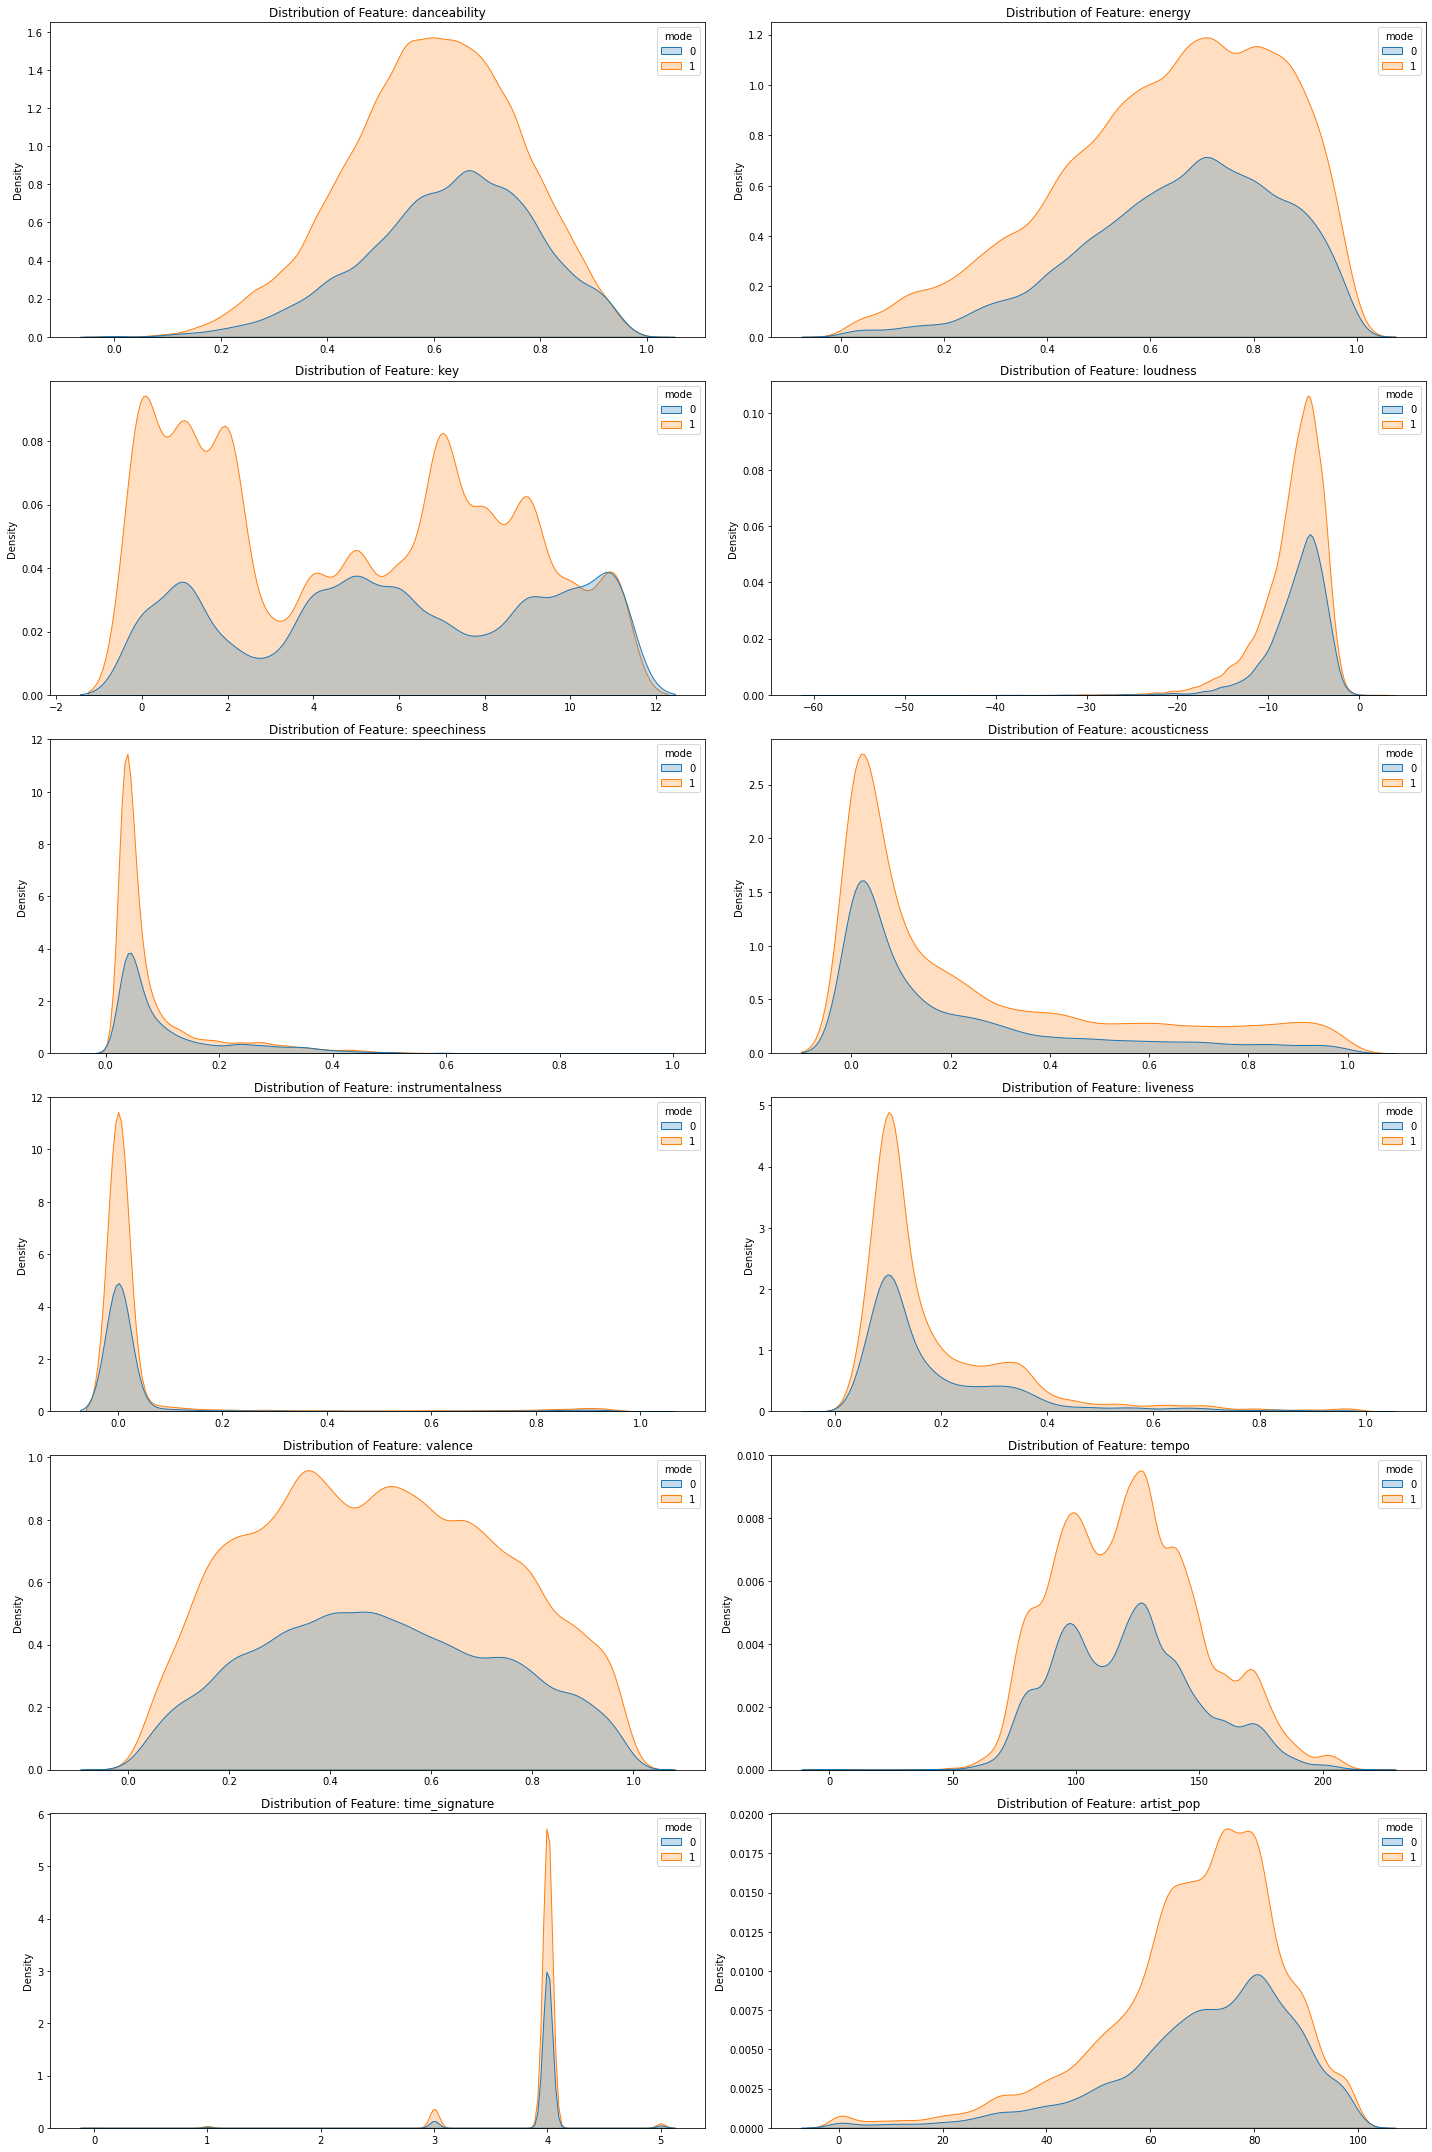

In [53]:
feature_distplot(numeric_data)

## Feature Engineering
<li>Sentiment Analysis</li>
<li>One-Hot Encoding</li>
<li>Normalization</li>

In [54]:
#Sentiment Analysis Function
def getSubjectivity(text):
  '''
  Getting the Subjectivity using TextBlob
  '''
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  '''
  Getting the Polarity using TextBlob
  '''
  return TextBlob(text).sentiment.polarity

def getAnalysis(score, task="polarity"):
  '''
  Categorizing the Polarity & Subjectivity score
  '''
  if task == "subjectivity":
    if score < 1/3:
      return "low"
    elif score > 1/3:
      return "high"
    else:
      return "medium"
  else:
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'

def sentiment_analysis(df, text_col):
  '''
  Perform sentiment analysis on text
  ---
  Input:
  df (pandas dataframe): Dataframe of interest
  text_col (str): column of interest
  '''
  df['subjectivity'] = df[text_col].apply(getSubjectivity).apply(lambda x: getAnalysis(x,"subjectivity"))
  df['polarity'] = df[text_col].apply(getPolarity).apply(getAnalysis)
  return df

In [55]:
sentiment_df=sentiment_analysis(new_df, "track_name")
sentiment_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,artist_name,track_name,duration_ms_x,album_name,name,danceability,energy,key,loudness,mode,...,tempo,type,id,duration_ms_y,time_signature,artist_pop,genres,track_pop,subjectivity,polarity
0,Missy Elliott,Lose Control (feat. Ciara & Fat Man Scoop),226863,The Cookbook,Throwbacks,0.904,0.813,4,-7.105,0,...,125.461,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,226864,4,74,"[dance_pop, hip_hop, hip_pop, pop, pop_rap, r&...",69,low,Neutral
6,Britney Spears,Toxic,198800,In The Zone,Throwbacks,0.774,0.838,5,-3.914,0,...,143.040,audio_features,6I9VzXrHxO9rA9A5euc8Ak,198800,4,84,"[dance_pop, pop, post-teen_pop]",83,low,Neutral
19,Beyoncé,Crazy In Love,235933,Dangerously In Love (Alben für die Ewigkeit),Throwbacks,0.664,0.758,2,-6.583,0,...,99.259,audio_features,0WqIKmW4BTrj3eJFmnCKMv,235933,4,86,"[dance_pop, pop, r&b]",25,high,Negative
46,Justin Timberlake,Rock Your Body,267266,Justified,Throwbacks,0.892,0.714,4,-6.055,0,...,100.972,audio_features,1AWQoqb9bSvzTjaLralEkT,267267,4,82,"[dance_pop, pop]",79,low,Neutral
55,Shaggy,It Wasn't Me,227600,Hot Shot,Throwbacks,0.853,0.606,0,-4.596,1,...,94.759,audio_features,1lzr43nnXAijIGYnCT8M8H,227600,4,75,"[pop_rap, reggae_fusion]",2,low,Neutral


### One-Hot Encoding & Normalization
We will convert categorical columns such as subjectivity, polarity, key, mode etc, to boolean values. O or 1.

In [56]:
 #Create a function using pandas' get_dummies() 
 def one_prep(df, column, new_name):     
    tf_df = pd.get_dummies(df[column])
    feature_names = tf_df.columns
    tf_df.columns = [new_name + "|" + str(i) for i in feature_names]
    tf_df.reset_index(drop = True, inplace = True)    
    return tf_df

In [57]:
#let's check out for polarity
pol_ohe= one_prep(new_df, 'polarity', 'pol')
pol_ohe.iloc[0:2]

,pol|Negative,pol|Neutral,pol|Positive
0,0,1,0
1,0,1,0


#### Feature Engineering
<p> Generate Final features by concating </p> 
<li>Normalization: Normalize artist popularity & track popularity</li>
<li>One-Hot Enconding</li>
<li>TF-IDF: starting point for similarity calculations (via TF-IDF vectorization + cosine similarity).</li>


In [68]:
#Create All Data Features Function 
def create_feature_set(df, float_cols):
    '''
    Process spotify df to create a final set of features that will be used to generate recommendations
    ---
    Input: 
    df (pandas dataframe): Spotify Dataframe
    float_cols (list(str)): List of float columns that will be scaled
            
    Output: 
    final (pandas dataframe): Final set of features 
    '''
    
    # Tfidf genre lists
    tfidf = TfidfVectorizer()
    tfidf_matrix =  tfidf.fit_transform(df['genres'].apply(lambda x: " ".join(x)))
    genre_df = pd.DataFrame(tfidf_matrix.toarray())
    genre_df.columns = ['genre' + "|" + i for i in tfidf.get_feature_names_out()]
    genre_df.drop(columns='genre|unknown') # drop unknown genre
    genre_df.reset_index(drop = True, inplace=True)
    
    # Sentiment analysis
    df = sentiment_analysis(df, "track_name")

    # One-hot Encoding
    subject_ohe = one_prep(df, 'subjectivity','subject') * 0.3
    polar_ohe = one_prep(df, 'polarity','polar') * 0.5
    key_ohe = one_prep(df, 'key','key') * 0.5
    mode_ohe = one_prep(df, 'mode','mode') * 0.5

    # Normalization
    # Scale popularity columns
    pop = df[["artist_pop","track_pop"]].reset_index(drop = True)
    scaler = MinMaxScaler()
    pop_scaled = pd.DataFrame(scaler.fit_transform(pop), columns = pop.columns) * 0.2 

    # Scale audio columns
    floats = df[float_cols].reset_index(drop = True)
    scaler = MinMaxScaler()
    floats_scaled = pd.DataFrame(scaler.fit_transform(floats), columns = floats.columns) * 0.2

    # Concanenate all features
    final = pd.concat([genre_df, floats_scaled, pop_scaled, subject_ohe, polar_ohe, key_ohe, mode_ohe], axis = 1)
    
    # Add song id
    final['id']=df['id'].values
    
    return final

In [71]:
columns_float=new_df.dtypes[new_df.dtypes=='float64'].index.values
Complete_feature_set=create_feature_set(new_df, columns_float)
#save dataset
Complete_feature_set.to_csv('complete_feature_set.csv')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [70]:
Complete_feature_set.head()

,genre|21st_century_classical,genre|432hz,genre|_hip_hop,genre|_roll,genre|a_cappella,genre|abstract_beats,genre|abstract_hip_hop,genre|accordion,genre|acid_jazz,genre|acid_rock,...,key|5,key|6,key|7,key|8,key|9,key|10,key|11,mode|0,mode|1,id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0UaMYEvWZi0ZqiDOoHU3YI
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,6I9VzXrHxO9rA9A5euc8Ak
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0WqIKmW4BTrj3eJFmnCKMv
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,1AWQoqb9bSvzTjaLralEkT
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1lzr43nnXAijIGYnCT8M8H


### Recommendation: Content-Based
<li>Choose Playlist</li>
<li>Extract Features</li>
<li>Find Similarity</li>


In [102]:
#step 1 Extract Playlist
input_play=input('Please enter playlist name:')
playlistDf_test=new_df[new_df['name']==input_play]

Please enter playlist name:Workout


,artist_name,track_name,duration_ms_x,album_name,name,danceability,energy,key,loudness,mode,...,tempo,type,id,duration_ms_y,time_signature,artist_pop,genres,track_pop,subjectivity,polarity
17797,Muse,Survival,257466,The 2nd Law,Workout,0.557,0.826,10,-4.545,0,...,164.010,audio_features,2IFqUmfW8oQoKn6ToxKsMs,257467,4,78,"[alternative_rock, modern_rock, permanent_wave...",59,low,Neutral
17799,Lady Gaga,ARTPOP,247533,ARTPOP,Workout,0.749,0.686,0,-4.390,1,...,117.037,audio_features,4t6HLZizcQiD8IvKUQU8il,247533,4,87,"[art_pop, dance_pop, pop]",0,low,Neutral
17800,Kanye West,I'm In It,234853,Yeezus,Workout,0.485,0.604,1,-4.591,1,...,170.337,audio_features,52NmkyHsGsHGb1UX8fTkMg,234853,4,94,"[chicago_rap, rap]",61,low,Neutral
17803,Lykke Li,I Never Learn,186093,I Never Learn,Workout,0.297,0.430,11,-6.828,0,...,119.943,audio_features,0H9k5RFDiHzL0WTPBk7Xz8,186093,4,72,"[art_pop, dance_pop, electropop, pop, swedish_...",43,low,Neutral
17804,M.I.A.,MATANGI,312013,Matangi,Workout,0.695,0.897,1,-2.716,0,...,139.999,audio_features,6MmnK5AF4N0jZVCLFWhgso,312013,4,71,"[dance_pop, escape_room, indietronica, new_rave]",38,low,Neutral


In [103]:
#extract features for songs in chosen playlist and the rest of the songs
def generate_playlist_feature(complete_feature_set, playlist_df):
    
    # Find song features in the playlist
    complete_feature_set_playlist = complete_feature_set[complete_feature_set['id'].isin(playlist_df['id'].values)]
    # Find all non-playlist song features
    complete_feature_set_nonplaylist = complete_feature_set[~complete_feature_set['id'].isin(playlist_df['id'].values)]
    complete_feature_set_playlist_final = complete_feature_set_playlist.drop(columns = "id")
    return complete_feature_set_playlist_final.sum(axis = 0), complete_feature_set_nonplaylist

In [106]:
complete_playlist_set_vector, complete_nonplaylist=generate_playlist_feature(Complete_feature_set, playlistDf_test)
#view top 5 non-playlist set
complete_nonplaylist.head()

,genre|21st_century_classical,genre|432hz,genre|_hip_hop,genre|_roll,genre|a_cappella,genre|abstract_beats,genre|abstract_hip_hop,genre|accordion,genre|acid_jazz,genre|acid_rock,...,key|5,key|6,key|7,key|8,key|9,key|10,key|11,mode|0,mode|1,id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0UaMYEvWZi0ZqiDOoHU3YI
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,6I9VzXrHxO9rA9A5euc8Ak
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0WqIKmW4BTrj3eJFmnCKMv
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,1AWQoqb9bSvzTjaLralEkT
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1lzr43nnXAijIGYnCT8M8H


In [107]:
complete_playlist_set_vector

genre|21st_century_classical     0.0
genre|432hz                      0.0
genre|_hip_hop                   0.0
genre|_roll                      0.0
genre|a_cappella                 0.0
                                ... 
key|9                            0.5
key|10                           3.5
key|11                           3.5
mode|0                          10.0
mode|1                          15.5
Length: 2178, dtype: float64

In [110]:
#find Similarity between summarized playlist vector and all other songs using cosine similarity
def generate_playlist_recos(df, vectorplaylist_features, nonplaylist_features):    
    non_playlist_df = df[df['id'].isin(nonplaylist_features['id'].values)]
    # Find cosine similarity between the playlist and the complete song set
    non_playlist_df['sim'] = cosine_similarity(nonplaylist_features.drop('id', axis = 1).values, vectorplaylist_features.values.reshape(1, -1))[:,0]
    non_playlist_df_top_40 = non_playlist_df.sort_values('sim',ascending = False).head(40)
    
    return non_playlist_df_top_40 

In [111]:
#generate top 10 recommendations
recommend_playlist=generate_playlist_recos(new_df, complete_playlist_set_vector, complete_nonplaylist)
recommend_playlist.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,artist_name,track_name,duration_ms_x,album_name,name,danceability,energy,key,loudness,mode,...,type,id,duration_ms_y,time_signature,artist_pop,genres,track_pop,subjectivity,polarity,sim
53025,Bruno Mars,That's What I Like - Alan Walker Remix,195888,That's What I Like,Electronic Music,0.692,0.896,1,-4.017,1,...,audio_features,1KtU0WCq472KzqCXgMOxkS,195889,4,92,"[dance_pop, pop]",62,low,Neutral,0.672992
52505,MKTO,Forever Until Tomorrow,226733,MKTO,music,0.519,0.819,1,-4.947,1,...,audio_features,7EaScyD2SKCSvZHqsY0RSK,226733,3,72,"[dance_pop, pop, pop_rap, pop_rock, post-teen_...",42,low,Neutral,0.671702
44185,Lady Gaga,Paper Gangsta,263360,The Fame,Favorite Songs,0.752,0.840,1,-5.047,1,...,audio_features,2iY7jqy8zBlbk5RliSfTH1,263360,4,87,"[art_pop, dance_pop, pop]",44,low,Neutral,0.670037
46476,Chris Brown,Up To You,247960,F.A.M.E.,in my feels,0.722,0.727,1,-3.374,1,...,audio_features,789fcu6AQuBkUEHMZtSE3l,247960,4,90,"[dance_pop, pop, pop_rap, r&b, rap]",0,low,Neutral,0.669298
60896,Kehlani,Wanted,130588,You Should Be Here,#mood,0.511,0.801,1,-3.588,1,...,audio_features,3kJudfRjZMItdFYVCCaSi6,130588,4,80,"[dance_pop, pop, pop_rap, r&b]",41,low,Neutral,0.669041
9049,Chris Brown,"Deuces Remix - f/Drake, T.I., Kanye West, Fabo...",403786,Deuces Remix,Hits,0.657,0.641,1,-5.152,1,...,audio_features,6EC5hHjYlwVmj8cpjSjJWA,403787,4,90,"[dance_pop, pop, pop_rap, r&b, rap]",53,low,Neutral,0.668948
45878,Chris Brown,Turn Up the Music,227973,Fortune,Party,0.594,0.841,1,-5.792,1,...,audio_features,53NqwMK7Q40vc1l1Ntkuz4,227973,4,90,"[dance_pop, pop, pop_rap, r&b, rap]",0,low,Neutral,0.668935
26136,Justin Timberlake,LoveStoned / I Think She Knows (Interlude),444333,FutureSex/LoveSounds,oldies,0.859,0.681,1,-6.247,1,...,audio_features,5iyE2d4U3Vc5cqY9mPTlpy,444333,4,82,"[dance_pop, pop]",59,low,Neutral,0.668825
45848,Chris Brown,Strip,167813,Fortune (Deluxe Version),Party,0.803,0.790,1,-4.353,1,...,audio_features,2i8hWheuwDUwyPrZynCLEF,167813,4,90,"[dance_pop, pop, pop_rap, r&b, rap]",0,low,Neutral,0.668589
17656,Bruno Mars,That's What I Like,206693,24K Magic,new,0.853,0.560,1,-4.961,1,...,audio_features,0KKkJNfGyhkQ5aFogxQAPU,206693,4,92,"[dance_pop, pop]",84,low,Neutral,0.668569


In [112]:
#Test Playlist
playlistDf_test[['artist_name', 'track_name']].head(10)

,artist_name,track_name
17797,Muse,Survival
17799,Lady Gaga,ARTPOP
17800,Kanye West,I'm In It
17803,Lykke Li,I Never Learn
17804,M.I.A.,MATANGI
17805,M.I.A.,Warriors
17806,M.I.A.,Y.A.L.A.
17807,Daft Punk,Prime Time Of Your Life / Brainwasher /Rollin ...
17808,Daft Punk,Human After All/Together/One More Time/Music S...
17809,Muse,Knights Of Cydonia
